In [2]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

In [15]:
from google.colab import files
uploaded=files.upload()

Saving Cutlets.csv to Cutlets.csv


In [16]:
cutlets=pd.read_csv("Cutlets.csv")

**QUESTION 1**

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

We are going to conduct a **2 tailed t-Test** on 2 Independent samples

We need to check whether the mean of both samples are different and Is there any significance difference between the two samples?


**Make two Hypothesis one contradicting to other Null Hypothesis is want we want to prove**

Null Hypothesis: μ1 = μ2

Alternative Hypthosis: μ1 ≠ μ2


**Decide a cut-off value**

Significance 5%
alpha = 0.05

**As it is a two-tailed test**

alpha/2 = 0.025

In [17]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


**Applying Descriptive Statistics**

In [18]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


**Checking the DataType**

In [19]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


**Ploting the Data**

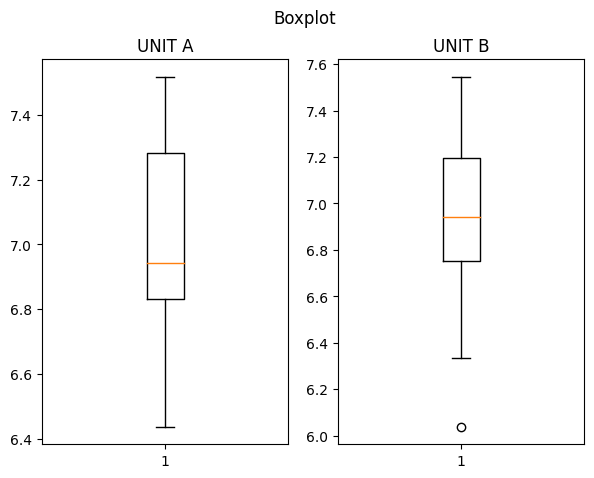

In [20]:
plt.subplots(figsize=(7,5))
plt.suptitle("Boxplot")
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title("UNIT A")
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title("UNIT B")
plt.show()

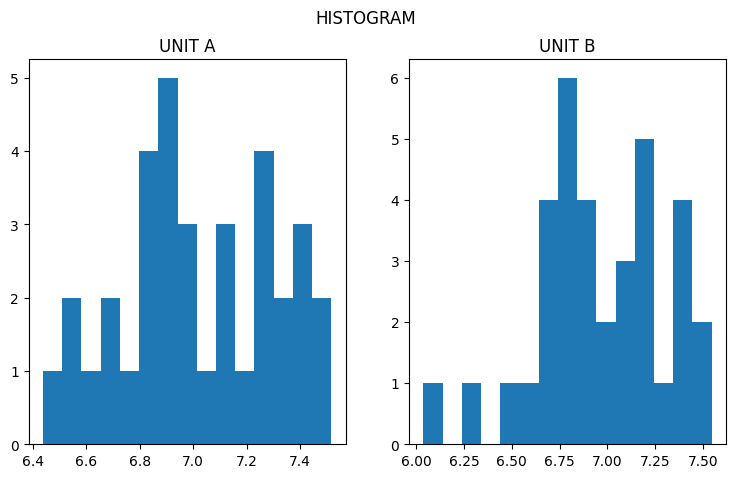

In [21]:
plt.subplots(figsize=(9,5))
plt.suptitle("HISTOGRAM")
plt.subplot(121)
plt.hist(cutlets['Unit A'],bins=15)
plt.title("UNIT A")
plt.subplot(122)
plt.hist(cutlets['Unit B'],bins=15)
plt.title("UNIT B")
plt.show()

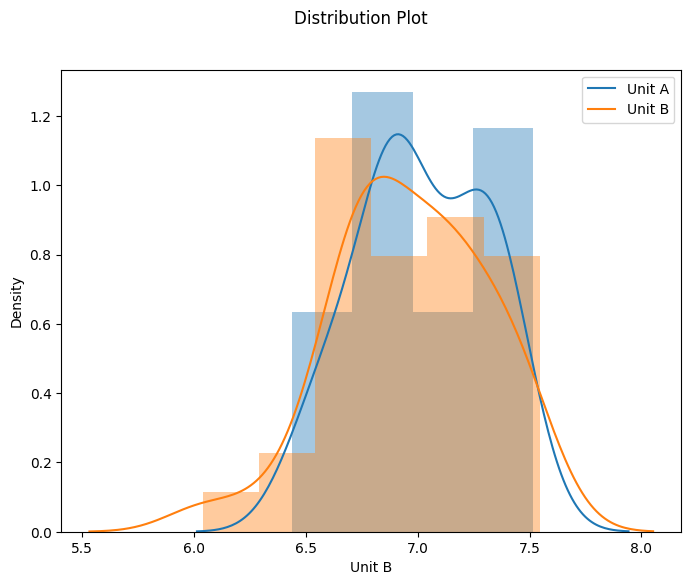

In [22]:
plt.figure(figsize = (8,6))
plt.suptitle("Distribution Plot")
labels = ["Unit A", "Unit B"]
sns.distplot(cutlets["Unit A"], kde = True)
sns.distplot(cutlets["Unit B"], kde = True)
plt.legend(labels)

**Plotting the Q-Q Plot to check whether the distribution follows normal distriution or not**

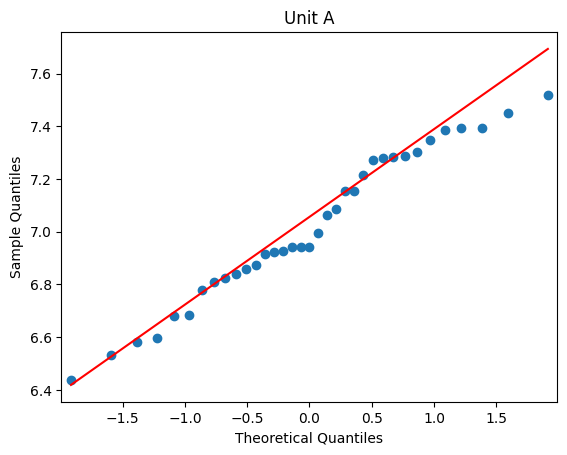

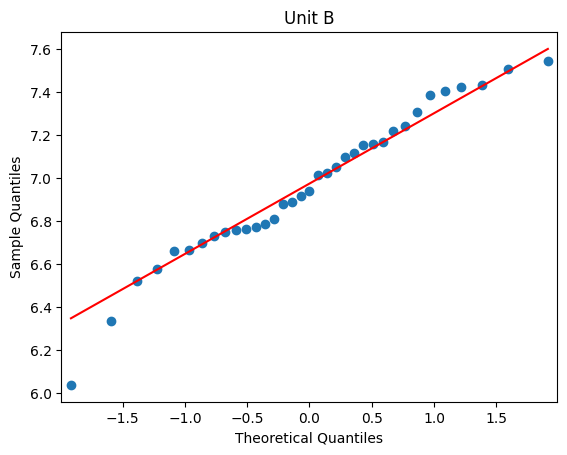

In [23]:
sm.qqplot(cutlets["Unit A"], line = 'q')
plt.title("Unit A")
sm.qqplot(cutlets["Unit B"], line = 'q')
plt.title("Unit B")
plt.show()

In [24]:
UnitA=pd.Series(cutlets.iloc[:,0])
UnitA.head()

0    6.8090
1    6.4376
2    6.9157
3    7.3012
4    7.4488
Name: Unit A, dtype: float64

In [25]:
UnitB=pd.Series(cutlets.iloc[:,1])
UnitB.head()

0    6.7703
1    7.5093
2    6.7300
3    6.7878
4    7.1522
Name: Unit B, dtype: float64

**Compare evidene with hypothesis testing using T-Statistics**

In [26]:
p_value=stats.ttest_ind(UnitA,UnitB)
p_value

TtestResult(statistic=0.7228688704678063, pvalue=0.4722394724599501, df=68.0)

**Compare P-value with Significance level**

**If p_value ≠ 'α' we failed to reject Null Hypothesis because of lack of evidence**

**If p_value is = 'α' we reject Null Hypothesis**

In [27]:
p_value=p_value.pvalue
alpha = 0.025
print('Significance=%.3f,p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significance=0.025,p=0.472
We fail to reject Null hypothesis


Hence, We **fail** to reject Null Hypothesis because of lack of evidence, there is **no**  **significant** difference between the two samples

**QUESTION 2**

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [28]:
from google.colab import files
uploaded=files.upload()

Saving LabTAT.csv to LabTAT.csv


In [29]:
lab=pd.read_csv("LabTAT.csv")

**We are going to conduct a ANOVA Test on 4 different samples,**
**We nee to check whether the mean any of the samples are different or not**

Make two Hypothesis one contradicting to other
Null Hypothesis is want we want to prove

**Null Hypothesis**: μ1=μ2 = μ3 = μ4

**Alternative Hypothesis**: Atleast One of them is Different


**Decide a cut-off value**

Significance 5%

alpha = 0.05

In [30]:
lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


**Applying Descriptive Statistics**

In [31]:
lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


**Checking the DataType**

In [32]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


**Ploting the Data**

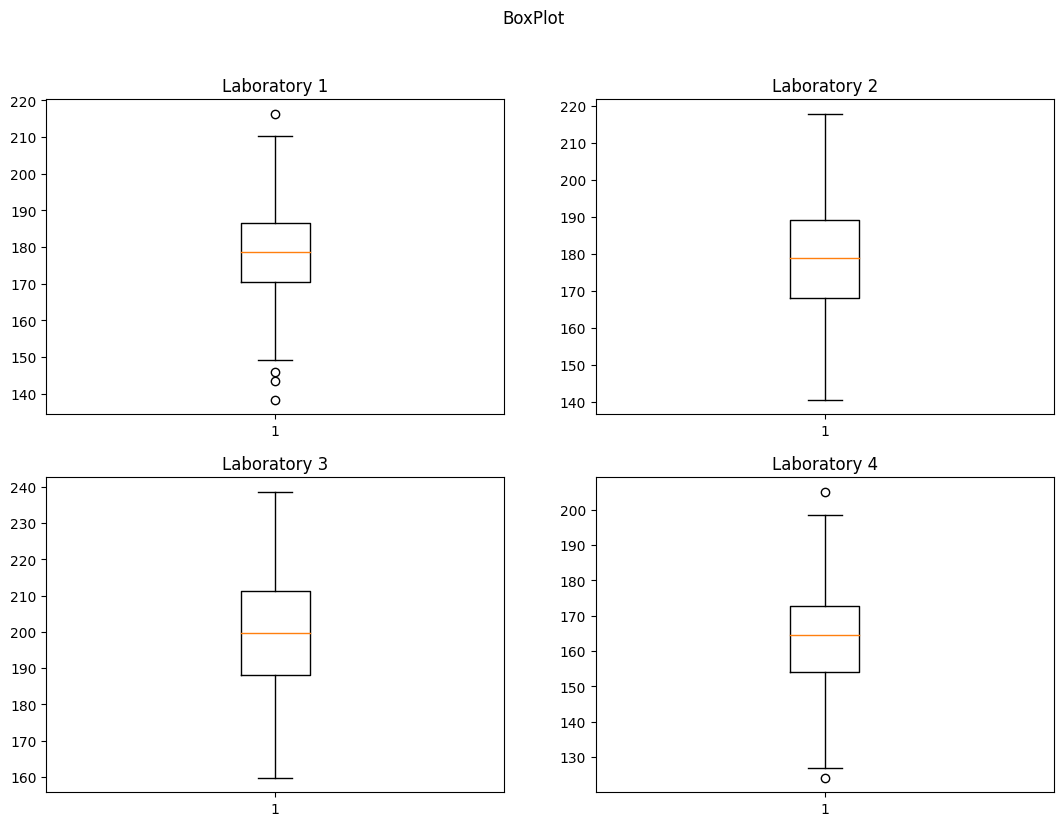

In [34]:
plt.subplots(figsize = (13,9))
plt.suptitle("BoxPlot")
plt.subplot(221)
plt.title("Laboratory 1")
plt.boxplot(lab["Laboratory 1"])
plt.subplot(222)
plt.title("Laboratory 2")
plt.boxplot(lab["Laboratory 2"])
plt.subplot(223)
plt.title("Laboratory 3")
plt.boxplot(lab["Laboratory 3"])
plt.subplot(224)
plt.title("Laboratory 4")
plt.boxplot(lab["Laboratory 4"])
plt.show()

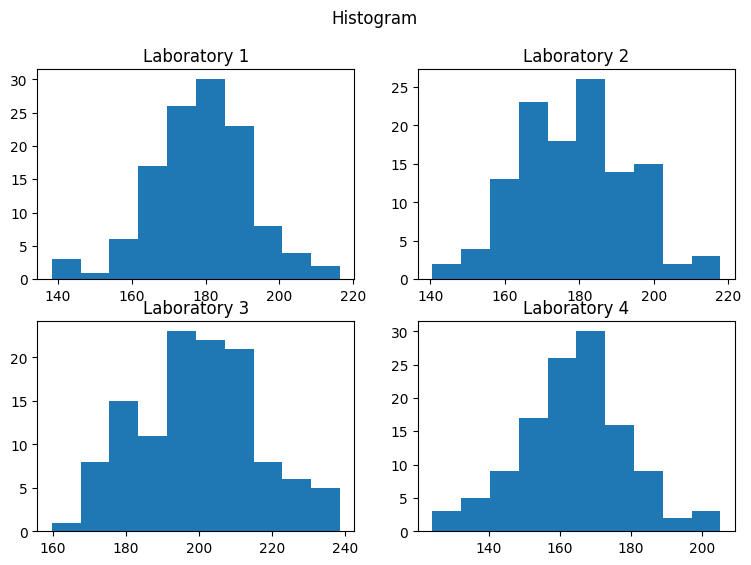

In [35]:
plt.subplots(figsize = (9,6))
plt.suptitle("Histogram")
plt.subplot(221)
plt.hist(lab['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(lab['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(lab['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(lab['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

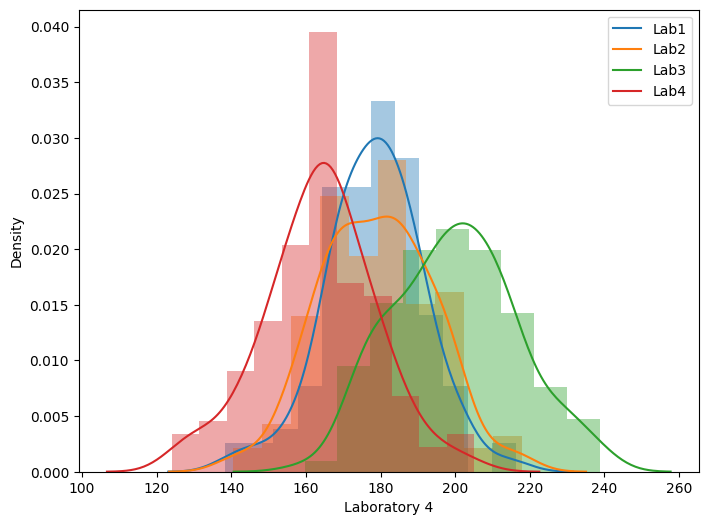

In [36]:
plt.figure (figsize=(8,6))
labels=['Lab1','Lab2','Lab3','Lab4']
sns.distplot(lab["Laboratory 1"],kde=True)
sns.distplot(lab["Laboratory 2"],hist=True)
sns.distplot(lab["Laboratory 3"],hist=True)
sns.distplot(lab["Laboratory 4"],hist=True)
plt.legend(labels)

**Plotting Q-Q Plot to check whether the distribution is normal distribution or not**

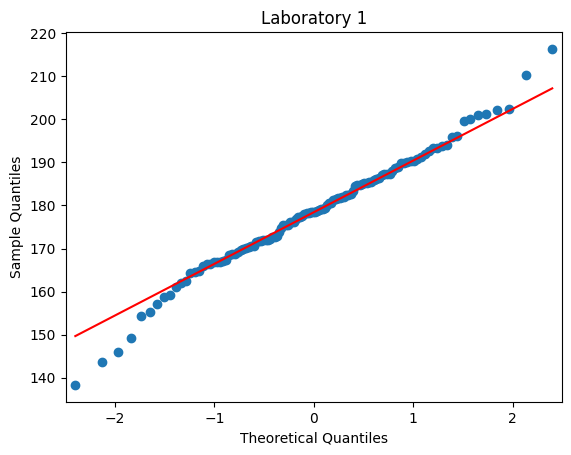

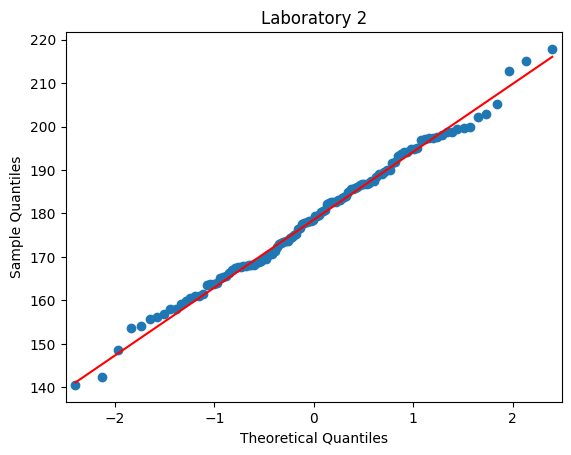

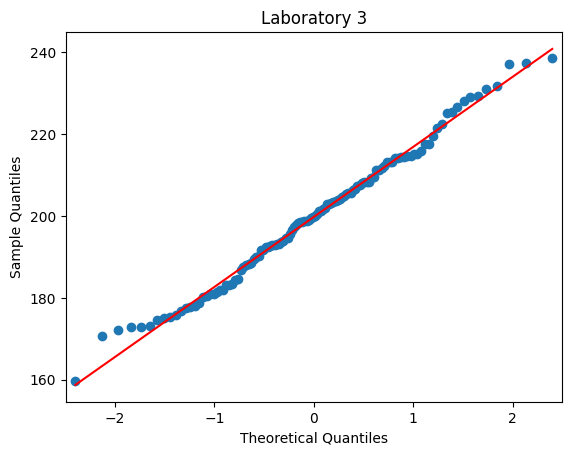

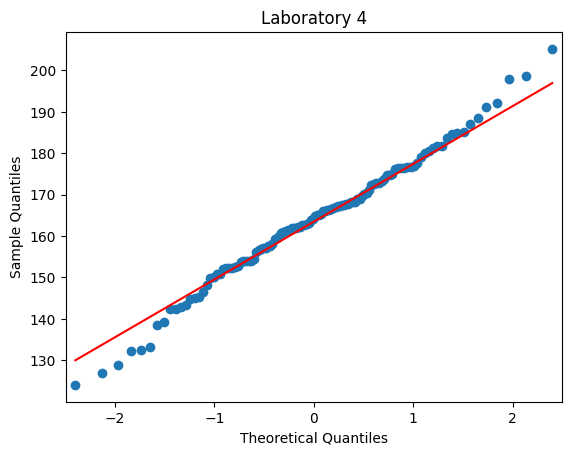

In [37]:
sm.qqplot(lab["Laboratory 1"],line='q')
plt.title("Laboratory 1")
sm.qqplot(lab["Laboratory 2"],line='q')
plt.title("Laboratory 2")
sm.qqplot(lab["Laboratory 3"],line='q')
plt.title("Laboratory 3")
sm.qqplot(lab["Laboratory 4"],line='q')
plt.title("Laboratory 4")
plt.show()

**Compare evidence with Hypothesis Testing using T-Statistics**

**If p_value ≠ 'α' we failed to reject Null Hypothesis because of lack of evidence**

**If p_value is = 'α' we reject Null Hypothesis**

In [38]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.472
We fail to reject Null hypothesis


**Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples**

**Question 3**


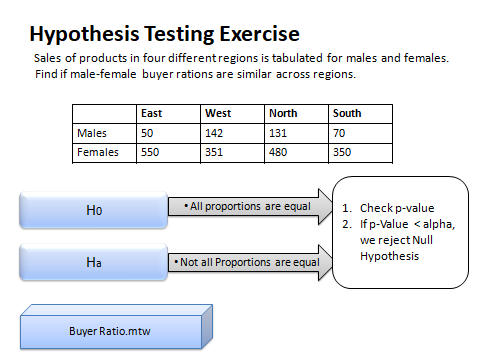

**We are going to conduct a Test of Independence using Chi-Square test with Contingency table,**
**We need to check whether the proportion of any of these samples are different or the same?**


**Make two Hypothesis one contradicting to otherNull Hypothesis is want we want to prove**

**Null Hypothesis**: There is no association or dependency between the gender based buyer rations across regions

**Alternative Hypthosis**: There is a significant association or dependency between the gender based buyer rations across regions

**Decide a cut-off value**

Significance 5%

alpha = 0.05

**As it is a one-tailed test**

alpha = 1-0.95 =0.05

In [39]:
from google.colab import files
uploaded=files.upload()

Saving BuyerRatio.csv to BuyerRatio.csv


In [40]:
buyer=pd.read_csv("BuyerRatio.csv", index_col = 0)
buyer

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


**Creating contingency Table**

In [41]:
table=[['50','142','131','70'],
      ['435','1523',1356,'750']]
print(table)

[['50', '142', '131', '70'], ['435', '1523', 1356, '750']]


**Applying Chi-Square χ2 contingency table to convert observed value into expected value**

In [42]:
from scipy.stats import chi2_contingency
stat, p, dof, exp = chi2_contingency(buyer)
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [43]:
table=np.array(table)
table=table.astype(int)
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [44]:
observed=np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected=np.array([ 42.76531299,  146.81287862,  131.11756787,72.30424052,442.23468701, 1518.18712138, 1355.88243213,  747.69575948])

**Comparing evidence Hypothesis**

In [45]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


**Compare p_value with 'α' (Significane Level)**


If p_value ≠ 'α' we failed to reject Null Hypothesis because of lack of evidence

If p_value is = 'α' we reject Null Hypothesis

In [46]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


We fail to reject Null Hypothesis because of lack evidence.

Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples

**Question 4**

TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

We are going to conduct a Test of Independence using Chi-Square test with Contingency table

Make two Hypothesis one contradicting to other

**Null Hypothesis is want we want to prove**

**Null Hypothesis**: μ1 = μ2 = μ3 = μ4

**Alternative Hypthosis**: Atleast One of them is Different

**Decide a cut-off value**

Significance 5%

alpha = 0.05

In [47]:
from google.colab import files
uploaded=files.upload()

Saving Costomer+OrderForm.csv to Costomer+OrderForm (1).csv


In [48]:
ordform=pd.read_csv("Costomer+OrderForm.csv")

In [49]:
ordform.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


**Applying Descriptive Statistics**

In [50]:
ordform.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


**Checking the DataType**

In [51]:
ordform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


**Checking the value counts**

In [52]:
print(ordform['Phillippines'].value_counts(),'\n',ordform['Indonesia'].value_counts(),'\n',ordform['Malta'].value_counts(),'\n',ordform['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


**Creating coningency table**

In [53]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


**Calculating expected value for observed data**

In [54]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


**Defining expected and observed values**

In [55]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

**Compare evidence with hypothesis using T-statistic**

In [56]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


**Compare p_value with 'α' (Significane Level)**


If p_value ≠ 'α' we failed to reject Null Hypothesis because of lack of evidence

If p_value is = 'α' we reject Null Hypothesis

**Interpreting the p-value**

In [57]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis


Hence,
We fail to reject Null Hypothesis because lack of evidence